In [6]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import censusdata
import re
import geopandas



In [7]:
#Define Funtions

#Funcion For NonDigit Removing Characters from Row
def remove_chars(s):
    clean = int(re.sub('[^0-9]+', '', str(s))[-11:])
    return clean

#Function to get census data according to requirements
def getcensustables(table):
    tablename = 'data_' + table
    print(tablename)
    
    # Set requirements to pull from Census API
    
    variablestopull = allvariablescsv.loc[allvariablescsv['Group']==table]['Name'].tolist()
    #print(variablestopull)
    
    #variablestopull = variables['Name'].tolist()

    #variablestopull = variables['Name'].tolist()
    listofcounties = ['121', '089']
    yearstopull = range(2012,2018,1)

    #Pull Census Data according to requirement above
    atlantadata = pd.DataFrame()

    for year in yearstopull:
        for county in listofcounties:

            newdata = censusdata.download('acs5', year, censusdata.censusgeo([('state', '13'), ('county', county), ('tract', '*')]),variablestopull)
            type(newdata)
            newdata['YEAR'] = year
            atlantadata = atlantadata.append(newdata)

    #Rename Column Headings from Code to Text
    for variable in variablestopull:
        #print(variable)
        renamevar1 = allvariablescsv.loc[allvariablescsv['Name']==variable]['Label'].iloc[0]
        renamevar2 = allvariablescsv.loc[allvariablescsv['Name']==variable]['Concept'].iloc[0]
        renamevar = renamevar2 + '_'+ renamevar1
        #print(renamevar)
        atlantadata = atlantadata.rename(columns={variable: renamevar})

    #Transform Index to create GeoID


    #Create GeoID Column
    atlantadata['Name2'] = atlantadata.index
    atlantadata['GEOID'] = atlantadata['Name2'].apply(remove_chars)
    atlantadata.drop(columns=['Name2'], inplace=True)
    
    #Only Keep Atlanta Census Tracts(Geocodes)
    finaldata = atlantageocodes.merge(atlantadata, how='left', on='GEOID')
    
    finaldata = finaldata.dropna(axis=0, how='any')
    
    return finaldata

In [8]:
#Code Begins here

#Tables to Load
tablestoloadcsv = pd.read_csv('data/tablestopull.csv')
tablestoload = tablestoloadcsv['Tables'].tolist()

#Allvariables Table
allvariablescsv = pd.read_csv('data/allvariables.csv')

#Atlanta Geo Codes Table
atlantageocodes = pd.read_csv('data/atlantageocodes.csv')

#Create dictionary with each cleaned table as an entry
alltables = dict()  

for table in tablestoload:
    data = getcensustables(table)
    alltables[table] = data
    
    data.to_csv('data/' + table + '.csv')

data_B19001
data_B25002
data_B25004


Text(0, 0.5, 'Occupancy %')

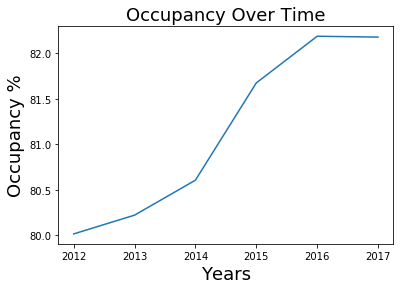

In [9]:
#Example Usage of Occupancy Over Time

occupancytable = alltables['B25002']

occupancytable = occupancytable.groupby('YEAR').sum()
occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 

#print(occupancytable.head())

occupancytable = occupancytable.reset_index()


plt.plot(occupancytable['YEAR'], occupancytable['Percent_Occupied'])
plt.title("Occupancy Over Time", fontsize=18)
plt.xlabel("Years", fontsize=18)
plt.ylabel("Occupancy %", fontsize=18)


,GEOID,OCCUPANCY STATUS_Estimate!!Total,OCCUPANCY STATUS_Estimate!!Total!!Occupied,OCCUPANCY STATUS_Estimate!!Total!!Vacant,YEAR,Percent_Occupied,STATEFP,COUNTYFP,TRACTCE,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,13121006601,1041.0,790.0,251.0,2012.0,75.888569,13,121,006601,66.01,Census Tract 66.01,G5020,S,1954145,0,+33.7115423,-084.4224014,"POLYGON ((-84.42924599999999 33.700467, -84.42..."
1,13121006601,1020.0,808.0,212.0,2013.0,79.215686,13,121,006601,66.01,Census Tract 66.01,G5020,S,1954145,0,+33.7115423,-084.4224014,"POLYGON ((-84.42924599999999 33.700467, -84.42..."
2,13121006601,1007.0,798.0,209.0,2014.0,79.245283,13,121,006601,66.01,Census Tract 66.01,G5020,S,1954145,0,+33.7115423,-084.4224014,"POLYGON ((-84.42924599999999 33.700467, -84.42..."
3,13121006601,1020.0,782.0,238.0,2015.0,76.666667,13,121,006601,66.01,Census Tract 66.01,G5020,S,1954145,0,+33.7115423,-084.4224014,"POLYGON ((-84.42924599999999 33.700467, -84.42..."
4,13121006601,1034.0,794.0,240.0,2016.0,76.789168,13,121,006601,66.01,Census Tract 66.01,G5020,S,1954145,0,+33.7115423,-084.4224014,"POLYGON ((-84.42924599999999 33.700467, -84.42..."
5,13121006601,995.0,764.0,231.0,2017.0,76.783920,13,121,006601,66.01,Census Tract 66.01,G5020,S,1954145,0,+33.7115423,-084.4224014,"POLYGON ((-84.42924599999999 33.700467, -84.42..."
6,13121006700,1864.0,1318.0,546.0,2012.0,70.708155,13,121,006700,67,Census Tract 67,G5020,S,3381411,30463,+33.7021727,-084.3954527,"POLYGON ((-84.403628 33.703041, -84.403592 33...."
7,13121006700,1924.0,1391.0,533.0,2013.0,72.297297,13,121,006700,67,Census Tract 67,G5020,S,3381411,30463,+33.7021727,-084.3954527,"POLYGON ((-84.403628 33.703041, -84.403592 33...."
8,13121006700,1953.0,1463.0,490.0,2014.0,74.910394,13,121,006700,67,Census Tract 67,G5020,S,3381411,30463,+33.7021727,-084.3954527,"POLYGON ((-84.403628 33.703041, -84.403592 33...."
9,13121006700,1981.0,1451.0,530.0,2015.0,73.245835,13,121,006700,67,Census Tract 67,G5020,S,3381411,30463,+33.7021727,-084.3954527,"POLYGON ((-84.403628 33.703041, -84.403592 33...."


AttributeError: Unknown property column

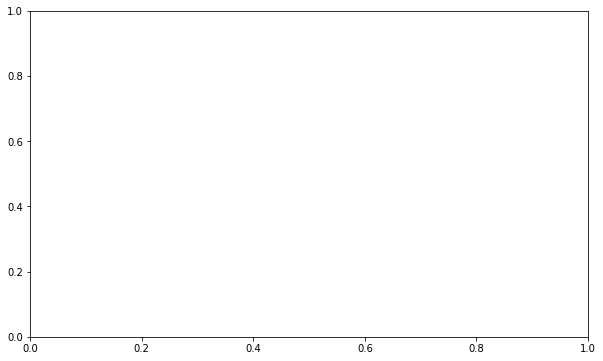

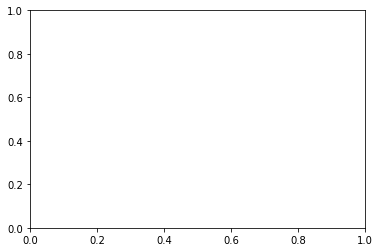

In [66]:
occupancytable = alltables['B25002']

occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 


geotable = geopandas.read_file('tractdata/tl_2018_13_tract.shp')
#geotable = geotable.astype('int64').dtypes
geotable[['GEOID']] = geotable[['GEOID']].astype('int64')

geotable2 = atlantageocodes.merge(geotable, how='left', on='GEOID')

geotable2 = geotable.set_index('GEOID').join(occupancytable.set_index('GEOID'))

geotable2 = geotable2.dropna(axis=0, how='any')

geotable2.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'Percent_Occupied'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

# create map
geotable2.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.title("Occupancy Rate By Area", fontsize=18)

Text(0.5, 1.0, 'Occupancy Rate By Area')

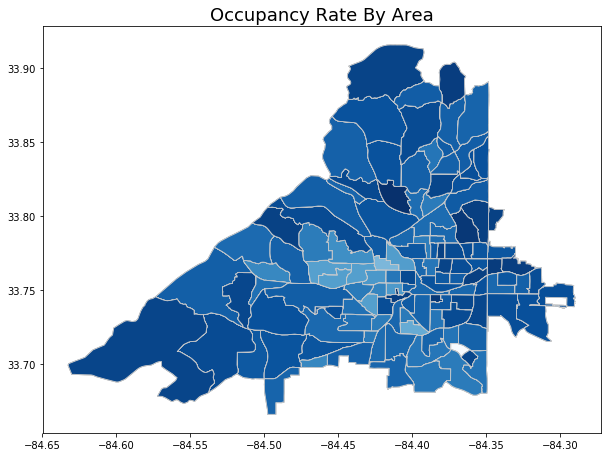

In [78]:
occupancytable = alltables['B25002']

occupancytable['Percent_Occupied'] = (occupancytable['OCCUPANCY STATUS_Estimate!!Total!!Occupied'] / occupancytable['OCCUPANCY STATUS_Estimate!!Total'])*100 


geotable = geopandas.read_file('tractdata/tl_2018_13_tract.shp')
#geotable = geotable.astype('int64').dtypes
geotable[['GEOID']] = geotable[['GEOID']].astype('int64')

geotable2 = atlantageocodes.merge(geotable, how='left', on='GEOID')

geotable2 = geotable.set_index('GEOID').join(occupancytable.set_index('GEOID'))

geotable2 = geotable2.dropna(axis=0, how='any')

geotable2.head()

# set a variable that will call whatever column we want to visualise on the map
variable = 'Percent_Occupied'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(10, 10))

# create map
geotable2.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

plt.title("Occupancy Rate By Area", fontsize=18)